## Comprehensions and generators

In [9]:
import math, json, collections, itertools

In [20]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from mpl_toolkits.basemap import Basemap
import geopy

### Code and data needed

List of olympic cities and years:

In [12]:
cities = []
years = []

for game in open('games.txt','r'):
    words = game.split()
    
    city = ' '.join(words[:-1])
    year = words[-1].strip('()')

    cities.append(city)
    years.append(year)

Geolocated olympic-city coordinates (from a JSON file):

In [13]:
coordinates_by_city = json.load(open('coords.json','r'))
coordinates_by_city

{'Helsinki': [24.9425683, 60.1674086],
 'Berlin': [13.3888599, 52.5170365],
 'Athens': [-82.1012554, 39.3292396],
 'Barcelona': [2.1771353, 41.3825596],
 'Stockholm': [18.0710935, 59.3251172],
 'Rome': [12.6308541512038, 41.85233365],
 'St Louis': [-90.1978888, 38.6272733],
 'Rio': [-43.2093726, -22.9110136],
 'Beijing': [116.391248, 39.9059631],
 'Montreal': [-73.6125179, 45.497684],
 'Tokyo': [139.294774527387, 34.2255804],
 'Melbourne / Stockholm': [144.9631608, -37.8142175],
 'Seoul': [126.9782914, 37.5666791],
 'London': [-0.1276473, 51.5073219],
 'Sydney': [151.210047, -33.8679573],
 'Mexico': [-99.1333415, 19.4326009],
 'Antwerp': [4.3997081, 51.2211097],
 'Moscow': [37.6174976, 55.7506828],
 'Los Angeles': [-118.2439408, 34.0543942],
 'Munich': [11.5753822, 48.1371079],
 'Atlanta': [-84.3901848, 33.7490987],
 'Amsterdam': [4.89797550561798, 52.3745403],
 'Paris': [2.3514992, 48.8566101]}

## Comprehensions
used for creating new list or dict from another iterables.

In [14]:
results = []
for city, year in zip(cities, years):
    if int(year) > 1945:
        results.append(city + ': ' + year)
        
results[:5]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964']

In [41]:
# same thing with comprehension
# f(elt) for elt in iterators if condition(elt)
results = [city + ': ' + year for city, year in zip(cities, years) if int(year) > 1945]
results[:5]

['London: 1948',
 'Helsinki: 1952',
 'Melbourne / Stockholm: 1956',
 'Rome: 1960',
 'Tokyo: 1964']

In [37]:
# same thing but with a dict instead of a list
cities_by_year = {year: city for city, year in zip(cities, years) if int(year) > 1805}
cities_by_year

# side note it's important to use year as the key in the dict because some cities have seen the olympic games multiples times  

{'1896': 'Athens',
 '1900': 'Paris',
 '1904': 'St Louis',
 '1908': 'London',
 '1912': 'Stockholm',
 '1920': 'Antwerp',
 '1924': 'Paris',
 '1928': 'Amsterdam',
 '1932': 'Los Angeles',
 '1936': 'Berlin',
 '1948': 'London',
 '1952': 'Helsinki',
 '1956': 'Melbourne / Stockholm',
 '1960': 'Rome',
 '1964': 'Tokyo',
 '1968': 'Mexico',
 '1972': 'Munich',
 '1976': 'Montreal',
 '1980': 'Moscow',
 '1984': 'Los Angeles',
 '1988': 'Seoul',
 '1992': 'Barcelona',
 '1996': 'Atlanta',
 '2000': 'Sydney',
 '2004': 'Athens',
 '2008': 'Beijing',
 '2012': 'London',
 '2016': 'Rio'}

In [38]:
# sets are usefull when you want to collect elts in a list only once
cities_after_1975 = {city for city, year in zip(cities, years) if int(year) > 1975}
cities_after_1975

{'Athens',
 'Atlanta',
 'Barcelona',
 'Beijing',
 'London',
 'Los Angeles',
 'Montreal',
 'Moscow',
 'Rio',
 'Seoul',
 'Sydney'}

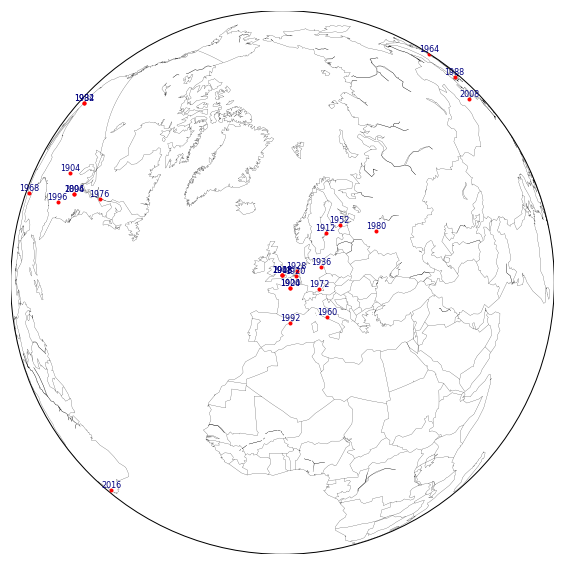

In [40]:
plt.figure(figsize = (10, 10))
world = Basemap(projection = 'ortho', lat_0 = 50, lon_0 = 0)
world.drawcoastlines(linewidth = 0.2)
world.drawcountries(linewidth = 0.2)

for year, city in  cities_by_year.items():
    # basemap need 2 arg lat & long: using the '*' notation to expend the tuple in coordinates_by_city
    x, y = world(*coordinates_by_city[city])
    world.plot(x, y , 'r.')
    plt.text(x, y, year, fontsize = 8, ha = 'center', va = 'bottom',  color = 'navy')

## Generators expressions
if we don't need to save the comprehension in a list but instead to consume it immediatly -> for that use use parenthesis instead of brackets

In [46]:
even = (i for i in range(10) if i%2 == 0)
even

<generator object <genexpr> at 0x7f13a1de8138>

In [47]:
even.__next__()

0

In [48]:
even.__next__()

2

In [50]:
sum(even)

18

you can write an iterator as a function that defines the method __next__()

In [52]:
def fibonacci():
    f1, f2 = 0, 1
    while True:
        yield f2
        f1, f2 = f2, f1 + f2

In [60]:
# defines an object / generator
f = fibonacci()
f

<generator object fibonacci at 0x7f13a1de8cf0>

In [61]:
# let's see the first 10 elts of the fibonacci serie
[next(f) for i in range(10)]
# next(f) is a shorthand for f.__next__( )

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]